In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('../evaluation')
from metrics_computer import EvalFilter

# Loading of example results

<Axes: xlabel='scale', ylabel='accuracy'>

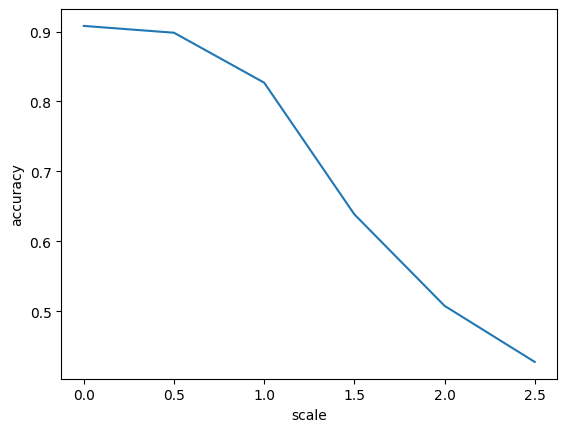

In [3]:
model = 'resnet18.a1_in1k'
shift = 'cartoon_style'
dfs = [pd.read_csv(f'results/{f}',index_col=0) for f in os.listdir('results') if model in f and shift in f]
df_res = dfs[0]
df_mean = df_res.groupby('scale')[model].mean()
df_res.groupby('scale')[model].mean().plot(ylabel='accuracy',label='scale')

<Axes: xlabel='scale', ylabel='accuracy drop'>

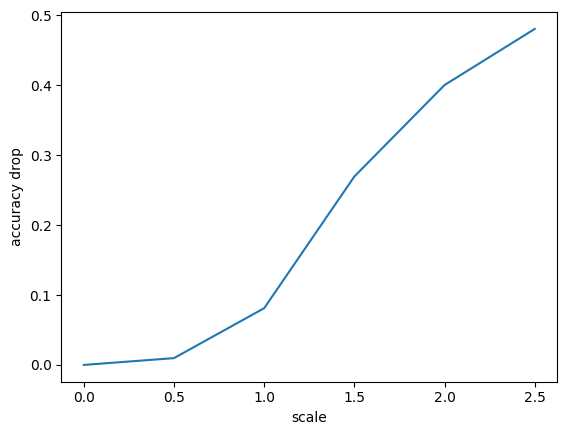

In [4]:
plt.figure(); (-(df_mean-df_mean.iloc[0])).plot(ylabel='accuracy drop')

Text(0.5, 1.0, 'Distribution of failure points')

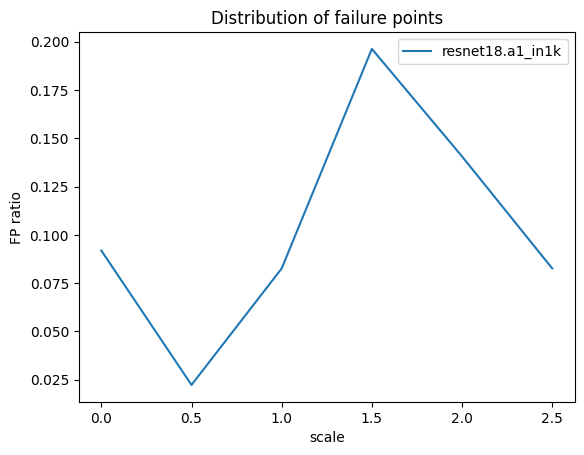

In [7]:
df_fp_avg, fp_collect = EvalFilter.compute_failure_points([model],df_res)
N = len(df_res[df_res['scale']==0])
(fp_collect/N).plot(xlabel='scale',ylabel='FP ratio'); plt.title("Distribution of failure points")

# Loading of multiple experiments and models

<Axes: xlabel='scale', ylabel='accuracy'>

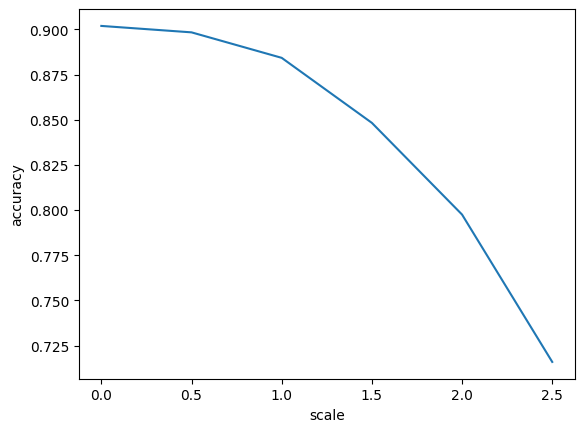

In [8]:
# For 1 model averaged over all shifts
model = 'resnet18.a1_in1k'
dfs = [pd.read_csv(f'results/{f}',index_col=0) for f in os.listdir('results') if model in f ]

df_res = pd.concat(dfs,axis=0)

df_res.groupby('scale')[model].mean().plot(ylabel='accuracy',xlabel='scale')

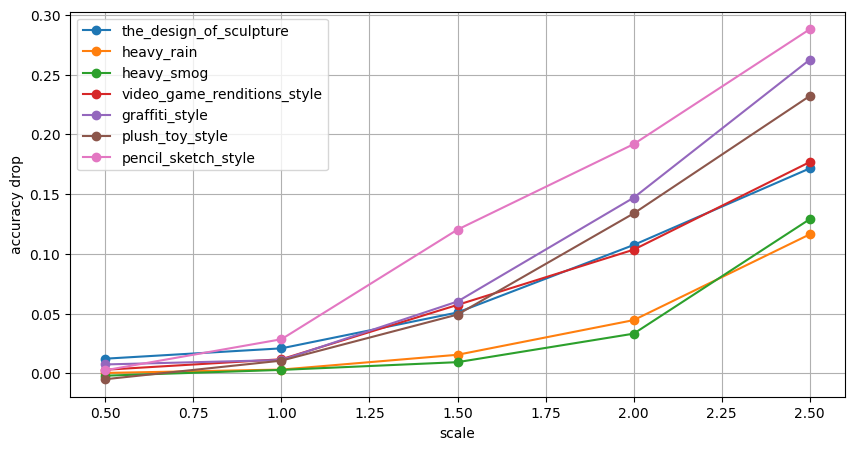

In [10]:
# For 1 model but all shifts
model = 'vit_base_patch16_224.augreg_in1k'
dfs = [pd.read_csv(f'results/{f}',index_col=0) for f in os.listdir('results') if model in f ]
dfs = pd.concat(dfs,axis=0)

for shift in dfs['shift'].unique()[::2]:
    df = dfs[dfs['shift']==shift]
    df_mean = df.groupby('scale')[model].mean()
    df_mean = -df_mean + df_mean.iloc[0]
    df_mean.iloc[1:].plot(ylabel='accuracy drop',xlabel='scale',label=shift,figsize=(10,5),grid=True, marker='o')
plt.legend()

<Axes: xlabel='scale', ylabel='accuracy'>

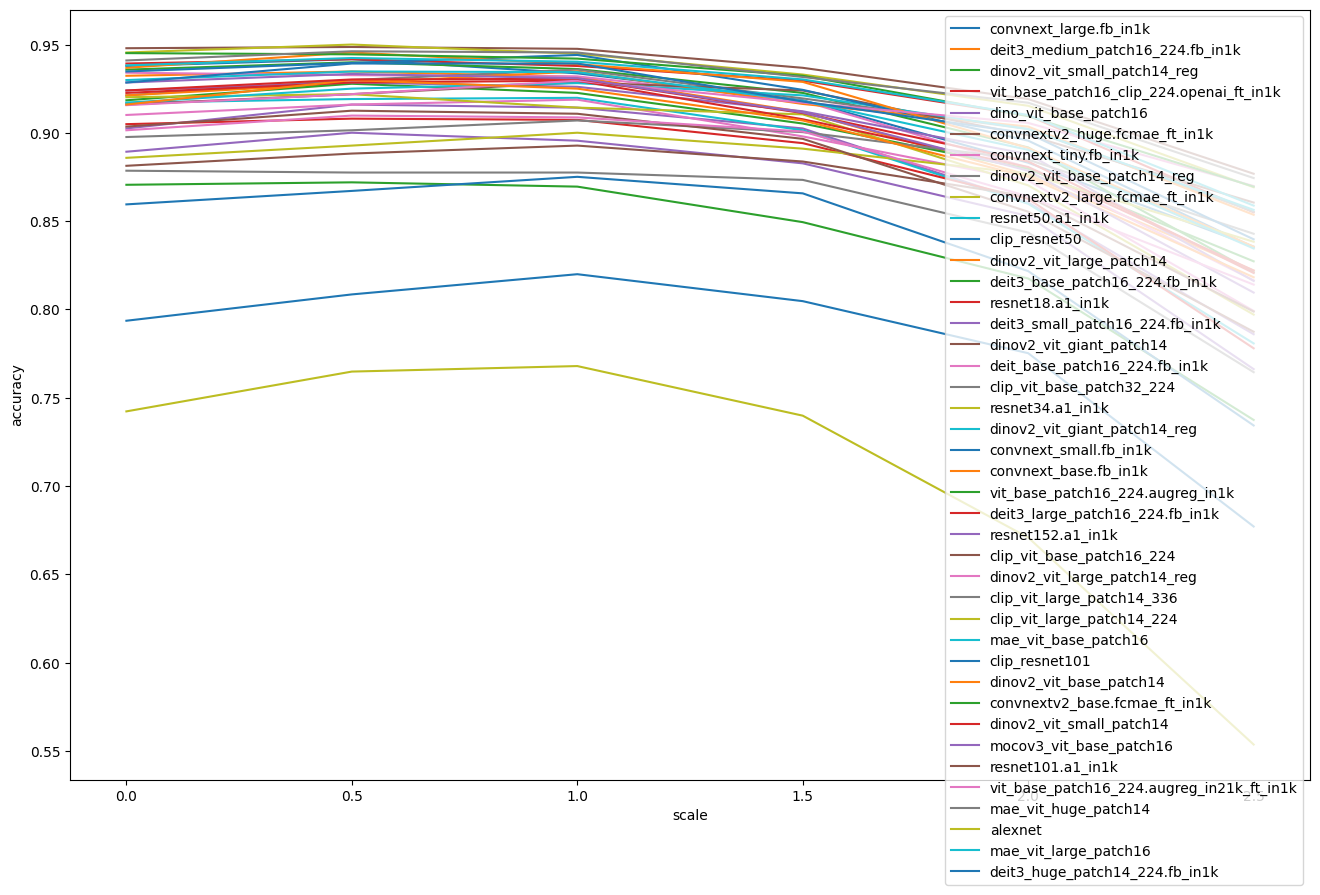

In [272]:
# For 1 shift
shift = "heavy_snow"
dfs = [pd.read_csv(f'results/{f}',index_col=0).reset_index(drop=True) for f in os.listdir('results') if shift in f ]


df_res = dfs[0]
for i in range(1,len(dfs)):
    cols_to_use = dfs[i].columns.difference(df_res.columns)
    df_res = pd.merge(df_res, dfs[i][cols_to_use], left_index=True, right_index=True)

all_models = [m for m in df_res.columns if m not in ['pred_class','gt_class','seed','scale','shift','class_str','img_name','class_name',]]
df_res.groupby('scale')[all_models].mean().plot(ylabel='accuracy',xlabel='scale',figsize=(16,10))